[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreofner/pyGPC/blob/master/demo.ipynb)


In [4]:
!git clone https://github.com/andreofner/pyGPC
!cd pyGPC
!python GPC.py

Cloning into 'pyGPC'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 195 (delta 48), reused 32 (delta 10), pack-reused 72
Receiving objects: 100% (195/195), 926.68 KiB | 9.08 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3653632/45929032 bytes (8.0%)7274496/45929032 bytes (15.8%)11018240/45929032 bytes (24.0%)14680064/45929032 bytes (32.0%)18374656/45929032 bytes (40.0%)22224896/45929032 bytes (48.4%)25911296/45929032 bytes (56.4%)

In [16]:
# Moving MNIST train and test predictions
# Run this cell twice if videos don't show 

from IPython.display import Image, display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Train set
print("TRAIN DATA")
Image(open('./figures/insMnist-Train-v0.gif','rb').read())
print("Inputs\n")
Image(open('./figures/p_hMnist-Train-v0.gif','rb').read())
print("Prediction from lowest hierarchical layer\n")
Image(open('./figures/p_gMnist-Train-v0.gif','rb').read())
print("Prediction from deepest hierarchical layer\n")

# Test set
print("\n\nTEST DATA")
Image(open('./figures/insMnist-Test-v0.gif','rb').read())
print("Inputs\n")
Image(open('./figures/p_hMnist-Test-v0.gif','rb').read())
print("Prediction from lowest hierarchical layer\n")
Image(open('./figures/p_gMnist-Test-v0.gif','rb').read())
print("Prediction from deepest hierarchical layer\n")

TRAIN DATA


Inputs



Prediction from lowest hierarchical layer



Prediction from deepest hierarchical layer



TEST DATA


Inputs



Prediction from lowest hierarchical layer



Prediction from deepest hierarchical layer



TRAIN DATA


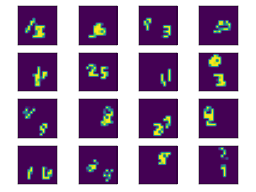

Inputs 



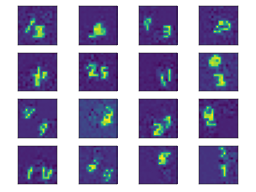

Predictions 



TEST DATA


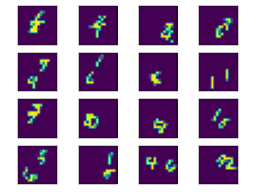

Inputs 



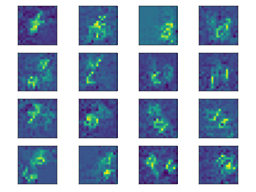

Predictions 



In [17]:
# Visualize batch of inputs and predictions

print("TRAIN DATA")
Image(open('./figures/Mnist-Train-v0input.png','rb').read())
print("Inputs \n")
Image(open('./figures/Mnist-Train-v0pred_g.png','rb').read())
print("Predictions \n")

print("\n\nTEST DATA")
Image(open('./figures/Mnist-Test-v0input.png','rb').read())
print("Inputs \n")
Image(open('./figures/Mnist-Test-v0pred_g.png','rb').read())
print("Predictions \n")

'\nSecond order perception in the visual domain\n\nHere, visual content is defined via second order statistics, i.e. without first-order perceptual content.\nRecognizing second-order objects requires top-down prediction of precision.\nThis renders second order perception a suitable task to contrast GPC with other architectures.\n\nThis script generates data comparable to pubmed.ncbi.nlm.nih.gov/25823866 with\nconvolutional neural networks as the generative model.\nGaussian noise enters the data generating process via parameter initialization.\n\nSecond order perception requires the estimated precision to be dependent on hidden states\nin higher layers, so that objects and their precision are predicted jointly.\n\nAndré Ofner 2021\n'

Text(0.5, 1.0, 'Causes Layer 3 (True cause)')

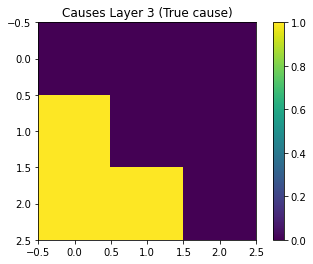

Text(0.5, 1.0, 'Causes Layer 2')

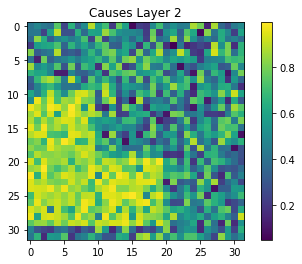

Text(0.5, 1.0, 'Causes Layer 1 (Sensory observation)')

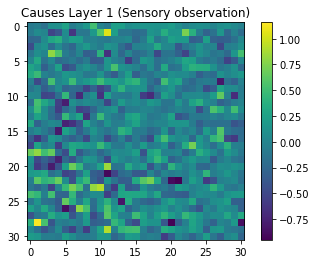

In [15]:
"""
Second order perception in the visual domain

Here, visual content is defined via second order statistics, i.e. without first-order perceptual content.
Recognizing second-order objects requires top-down prediction of precision.
This renders second order perception a suitable task to contrast GPC with other architectures.

This script generates data comparable to pubmed.ncbi.nlm.nih.gov/25823866 with
convolutional neural networks as the generative model.
Gaussian noise enters the data generating process via parameter initialization.

Second order perception requires the estimated precision to be dependent on hidden states
in higher layers, so that objects and their precision are predicted jointly.

André Ofner 2021
"""

import torch
import matplotlib.pyplot as plt
from torch import nn

# Layer 3 causes: Position of object
input = torch.zeros([1,1,3,3])
input[:,:,2,1] = 1
input[:,:,2,0] = 1
input[:,:,1,0] = 1

# Layer 2 causes: Position of object in sensory space
m = nn.ConvTranspose2d(1, 10, (10, 10), stride=10, padding=(0, 0), output_padding=(2, 2), bias=None)
_ = torch.nn.init.ones_(m.weight)
output = m(input).mean(dim=1).unsqueeze(1)
output = torch.sigmoid(output*2+(torch.randn_like(output))) # add innovation

# Layer 1 causes (observable): Object in sensory space
m = nn.Conv2d(1, 10, (2, 2), stride=1, bias=False, padding_mode="reflect")
_ = torch.nn.init.normal_(m.weight, 0, 1)
output2 = m((output*torch.randn_like(output))).mean(dim=1).unsqueeze(1)
output2 = output2

plt.imshow(input.detach().numpy().reshape(input.shape[-1],input.shape[-1]))
plt.colorbar()
plt.title("Causes Layer 3 (True cause)")
plt.show()

plt.imshow(output.detach().numpy().reshape(output.shape[-1],output.shape[-1]))
plt.colorbar()
plt.title("Causes Layer 2")
plt.show()

plt.imshow(output2.detach().numpy().reshape(output2.shape[-1],output2.shape[-1]))
plt.colorbar()
plt.title("Causes Layer 1 (Sensory observation)")
plt.show()
